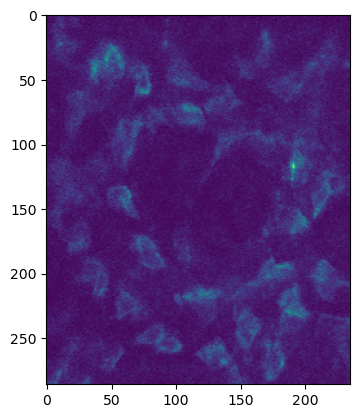

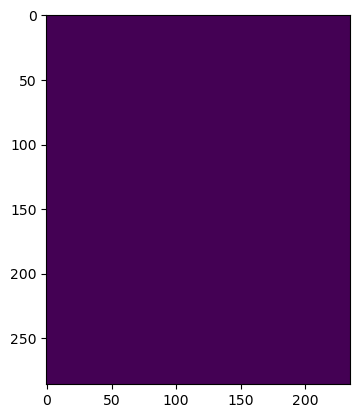

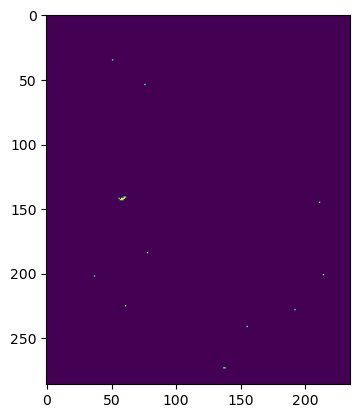

/opt/homebrew/anaconda3/envs/sci/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:98: RuntimeWarning: divide by zero encountered in double_scalars
  scale_factor = -beta / (10 * data.std())
/opt/homebrew/anaconda3/envs/sci/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:103: RuntimeWarning: invalid value encountered in multiply
  weights = np.exp(scale_factor * gradients)
/opt/homebrew/anaconda3/envs/sci/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:206: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


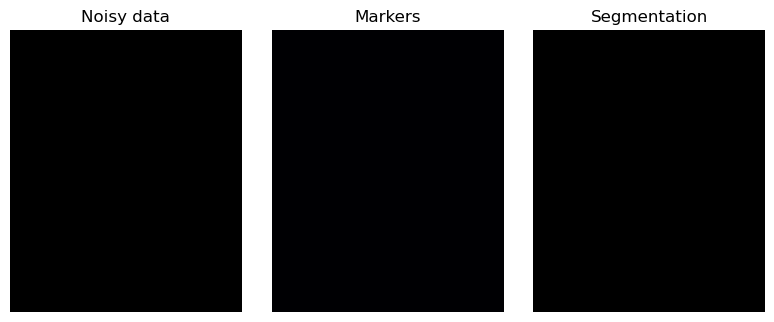

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
from skimage import io, img_as_float

rng = np.random.default_rng()

# Generate noisy synthetic data
image = io.imread('/Users/dobrik4ever/Library/CloudStorage/OneDrive-Personal/Documents/Study/winter_21-22/Master Thesis/4 Raw data/Marie1.tif')

seed = image[:,:,2]
image = image[:,:,0].astype(np.float32)
sigma = 30.0
data = rescale_intensity(image, in_range=(-sigma, 1 + sigma),
                         out_range=(-1, 1))

# The range of the binary image spans over (-1, 1).
# We choose the hottest and the coldest pixels as markers.


# Run random walker algorithm
seed[seed != 0] = 1
labels = random_walker(data, seed, beta=10, mode='bf')

# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 3.2),
                                    sharex=True, sharey=True)
ax1.imshow(data, cmap='gray')
ax1.axis('off')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='magma')
ax2.axis('off')
ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray')
ax3.axis('off')
ax3.set_title('Segmentation')

fig.tight_layout()
plt.show()


In [13]:
img_as_float(binary_blobs(length=128, seed=1)).min()

0.0